In [90]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = pd.read_excel("reviews.xlsx")

In [78]:
# import pandas as pd 
# from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer 

# #example class
# reviews_cs010b = reviews[reviews["Class"] == "CS010B"].copy()
# cs010b = ' '.join(reviews_cs010b["Additional Comments"].tolist())
# cs010b = cs010b.replace("\n", "")
# cs010b = cs010b.replace("\'", "")
# cs010b = [cs010b]

# #instantiate CountVectorizer() 
# cv=CountVectorizer() 
# # this steps generates word counts for the words in your docs 
# word_count_vector=cv.fit_transform(cs010b)
# tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
# tfidf_transformer.fit(word_count_vector)
# # print idf values 
# df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# # sort ascending 
# df_idf.max()

In [131]:
classes = reviews["Class"].unique()
classes = np.delete(classes, 0)
reviews[reviews["Class"] == 'ANTH006']

,Unnamed: 0,Class,Average Difficulty,Additional Comments,Difficulty,Date,Polarity
60,60,ANTH006,See MUS006,NaN,NaN,NaN,5.268519


In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

reviews = reviews[reviews["Additional Comments"].isna() == False]

#example class
classes = reviews["Class"].unique()
classes = np.delete(classes, 0)
columns = []
corpus = []
for cl in classes:
    if(type(cl) != float):
        reviews_cl = reviews[reviews["Class"] == cl].copy()
        cl_str = ' '.join(reviews_cl["Additional Comments"].tolist())
        cl_str = cl_str.replace("\n", "")
        cl_str = cl_str.replace("\'", "")
        columns = columns + [cl]
        corpus = corpus + [cl_str]

In [153]:
# reviews_cl
# corpus = []
# cl_str = ' '.join(reviews_cl["Additional Comments"].tolist())
# cl_str = cl_str.replace("\n", "")
# cl_str = cl_str.replace("\'", "")
# cl_str
# corpus = corpus + [cl_str] + [cl_str]
# corpus

['if you just do the essays and participate a little in class you can get an easy A. Professor Brookshire is super nice and accommodating. ',
 'if you just do the essays and participate a little in class you can get an easy A. Professor Brookshire is super nice and accommodating. ']

In [157]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()


,10,100,12,15,19,1a,20,200,2018,2019,...,years,yes,youd,youll,young,youre,youtube,youve,zhang,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
data = df.transpose()
data.columns = columns
# Find the top 30 words said by each President
top_dict = {}
for c in range(len(corpus)):
    top = data.iloc[:,c].sort_values(ascending=False).head(30)
    top_dict[data.columns[c]]= list(zip(top.index, top.values))
# Print the top 15 words said by each President

for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

AHS008
accommodating, participate, essays, little, nice, super, just, easy, professor, probably, prior, previous, presentations, pretty
---
AHS010S
answer, gotta, questions, page, short, sounds, shows, pop, key, quizzes, luck, using, terms, midterm
---
AHS017B
powerpoints, puts, sections, ilearn, instead, memorize, information, gave, final, easier, points, project, attendance, exam
---
AHS021
readings, skim, assignments, articles, explaining, participate, mainly, recorded, pretty, specific, require, really, spring, writing
---
AHS023
particularly, arent, great, bad, exams, easy, professor, properly, proofs, pre, prepare, prepared, present, presentation
---
AHS028
isnt, based, days, pages, page, weeks, difficult, final, lecture, essay, gives, 10, readings, midterm
---
AHS165
regarding, various, 2022, asynchronous, summer, simple, easy, essay, attendance, readings, based, read, assignments, sure
---
ANTH001
readings, extra, easy, discussion, poll, questions, credit, lecture, essays, pay,

In [162]:
len(columns)

650

In [193]:
data.iloc[:, 472:]

,MUS080E,MUS080R,MUS165,NASC092,NASC093,NASC198,PBPL001,PBPL002,PBPL004,PBPL101,...,STAT171,STAT183,TFDP010,TFDP021,TFDP022,TFDP050S,TFDP052,TFDP066,VNM002,VNM003
10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084742
12,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
15,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
19,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youre,0.0,0.0,0.0,0.0,0.0,0.0,0.030673,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
youtube,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
youve,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
zhang,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [199]:
for col in data.iloc[:, 474:]:
    wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(data[col])
    wordcloud.to_file(col + '.png')

In [166]:
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(data["MGT231"])


ZeroDivisionError: float division by zero

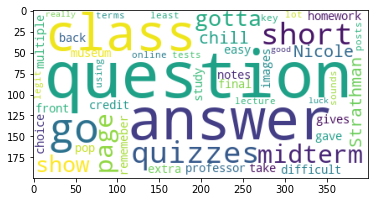

In [46]:
reviews["WordCloud"] = np.nan
w = WordCloud(background_color='white').generate(reviews["Additional Comments"][2])
plt.imshow(w)

In [27]:
reviews["Additional Comments"][2]

'Nicole Strathman is a very chill professor. Class is not that difficult if you go to class and take notes. No homework, gave out extra credit which was to go to a museum and answer the questions, she gives out pop quizzes which are short answer(about 3-4 questions), midterm was short answer questions and a page front and back of multiple choice (midterm is easy only if you study) gotta rememeber the images she shows, final is online and she posts questions all you gotta do is answer each question using key terms and at least a page each. legit all her quizzes and tests are all on the lecture so just show up to class. sounds like a lot but its really not. good luck. '

In [19]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [ ]:
from IPython.display import FileLinks
FileLinks("pictures")
from shutil import make_archive
make_archive('pictures', 'zip')